## Stock Market Prediction and forcasting using stacked LSTM

In [2]:
import pandas_datareader as pdr
key="e302b70791da0db4d3a965219b87342bd7e1b500" # from tiingo documentation -https://www.tiingo.com/documentation/general/overview

In [6]:
## how to get data from tingo
# # data = pdr.get_data_tiingo('AAPL', api_key=key)
# df = data['AAPL']['close']
# df.to_csv('AAPL.csv')

In [7]:
import pandas as pd

In [11]:
df = pd.read_csv('AAPL.csv',index_col=False)

In [15]:
df.columns

Index(['Unnamed: 0', 'symbol', 'date', 'close', 'high', 'low', 'open',
       'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume',
       'divCash', 'splitFactor'],
      dtype='object')

In [16]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [17]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [18]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [ ]:
# we have data till 2020-05-22 for apple stock price

In [19]:
# taking feature close which consist of the closing price of stock and we are going to do predcition with the help of close

df1=df.reset_index()['close']

In [20]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [21]:
df1.shape

(1258,)

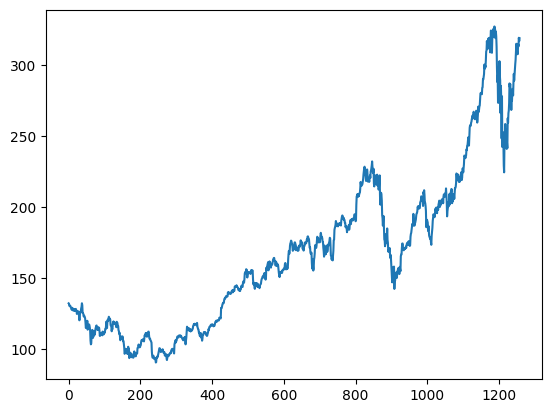

In [22]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [23]:
# lstm are sensitive to the scale of the data so doing minmax scaler( normalizig the data between 0to1)

In [24]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [25]:
df1.shape

(1258, 1)

In [26]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [27]:
##splitting dataset into train and test split
## this method is use to specialy split timeseries data because sequence of data is important because data is collected every day
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
# here in between training and test data we are not taking some data

In [28]:
train_data.shape,test_data.shape

((817, 1), (441, 1))

In [29]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

> suppose if we have data 120,130,140,150,160,170 and if timestep = 3 

> example if we want to predict for 150 and time step is 3 i.e we are using last three value to predict 150 i.e 120,130,140 i.e we are using previous 3 day values

In [42]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		print(f"Sequence from index {i} to {i + time_step}: {a}")
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [41]:
# example for above code:

import numpy as np

# Sample data: a two-dimensional NumPy array
data = np.array([
    [1], [2], [3], [4], [5], [6], [7], [8], [9], [10]
])

# Define the time step
time_step = 3

# Example loop to demonstrate the line in question
for i in range(len(data) - time_step):
    # Extract a sequence of length 'time_step' from the data starting at index 'i'
    a = data[i:(i + time_step), 0]  # [i, i+1, i+2] rows and 0th column

    # Display the sequence for illustration
    print(f"Sequence from index {i} to {i + time_step}: {a}")


Sequence from index 0 to 3: [1 2 3]
Sequence from index 1 to 4: [2 3 4]
Sequence from index 2 to 5: [3 4 5]
Sequence from index 3 to 6: [4 5 6]
Sequence from index 4 to 7: [5 6 7]
Sequence from index 5 to 8: [6 7 8]
Sequence from index 6 to 9: [7 8 9]


In [49]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

Sequence from index 0 to 100: [0.17607447 0.17495567 0.16862282 0.1696994  0.16727181 0.16794731
 0.16473866 0.16174111 0.1581525  0.15654817 0.16271215 0.1614878
 0.1554927  0.15443722 0.15730811 0.15604154 0.15849025 0.15308621
 0.15735033 0.15490163 0.15946129 0.15688592 0.1537195  0.14434687
 0.14812547 0.15308621 0.15241071 0.15055307 0.14924428 0.13607194
 0.12551718 0.13906949 0.14911762 0.14890653 0.15401503 0.16115005
 0.16583636 0.17618002 0.17060711 0.14725998 0.14700667 0.14422021
 0.13691632 0.13949168 0.13784514 0.13522756 0.13071012 0.11863548
 0.10259225 0.1058009  0.10466098 0.10630752 0.12403952 0.09773706
 0.10512539 0.10474542 0.10816516 0.11323144 0.11044499 0.10415435
 0.09419066 0.06510175 0.05395592 0.0565735  0.08169383 0.09533058
 0.09689268 0.09465507 0.07337668 0.09288187 0.08456472 0.07992063
 0.09275521 0.0836359  0.09385291 0.10077683 0.10542092 0.10951617
 0.11006502 0.09955248 0.09756818 0.10499873 0.09735709 0.10124124
 0.10411213 0.10288778 0.09330406

In [50]:
X_train

array([[0.17607447, 0.17495567, 0.16862282, ..., 0.09055982, 0.08388922,
        0.09085536],
       [0.17495567, 0.16862282, 0.1696994 , ..., 0.08388922, 0.09085536,
        0.0873934 ],
       [0.16862282, 0.1696994 , 0.16727181, ..., 0.09085536, 0.0873934 ,
        0.09030651],
       ...,
       [0.34801148, 0.32930845, 0.32145571, ..., 0.50042219, 0.50413747,
        0.5062062 ],
       [0.32930845, 0.32145571, 0.32694419, ..., 0.50413747, 0.5062062 ,
        0.51920966],
       [0.32145571, 0.32694419, 0.32230009, ..., 0.5062062 , 0.51920966,
        0.53719497]])

In [51]:
y_train

array([0.0873934 , 0.09030651, 0.09891919, 0.09887697, 0.10622309,
       0.1213375 , 0.10529427, 0.10221228, 0.12213966, 0.12745926,
       0.1231107 , 0.1302035 , 0.13607194, 0.13366546, 0.1291058 ,
       0.12969687, 0.12762813, 0.1115849 , 0.10879845, 0.1071519 ,
       0.09288187, 0.10062906, 0.09858144, 0.11378029, 0.12007093,
       0.12226632, 0.11572237, 0.12049312, 0.1169045 , 0.11597568,
       0.11804441, 0.11399139, 0.10951617, 0.10495651, 0.1211264 ,
       0.11795998, 0.11774888, 0.10672971, 0.10905176, 0.09642827,
       0.09347294, 0.08507135, 0.08865997, 0.07869628, 0.06624166,
       0.07173014, 0.07130795, 0.07713417, 0.07468547, 0.06957697,
       0.07768302, 0.07168792, 0.0629908 , 0.06337077, 0.05222494,
       0.04373892, 0.02579583, 0.027949  , 0.03457739, 0.04061471,
       0.02976442, 0.03875707, 0.02866672, 0.02668243, 0.02723128,
       0.02516254, 0.04677869, 0.03841932, 0.04074137, 0.01300346,
       0.01583214, 0.02955332, 0.02571139, 0.01747868, 0.02537

In [52]:
print(X_train.shape), print(y_train.shape),print(X_test.shape),print(y_test.shape)
# 100 features in x_train because our time step is 100

(716, 100)
(716,)
(340, 100)
(340,)


(None, None, None, None)

In [53]:
# converting X_train  and X_test into 3D using reshape 
# X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
# X_train.shape[0] = 716
# # X_train.shape[1] = 100 i.e features created because of time stamps

# X_test.shape[0] = 340
# # X_test.shape[1] = 100 i.e features created because of time stamps



In [54]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [56]:
X_train.shape

(716, 100, 1)

In [57]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [58]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [60]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 209ms/step - loss: 0.0283 - val_loss: 0.0741
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - loss: 0.0049 - val_loss: 0.0060
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - loss: 0.0010 - val_loss: 0.0049
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - loss: 9.3280e-04 - val_loss: 0.0040
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - loss: 7.0902e-04 - val_loss: 0.0048
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - loss: 5.9551e-04 - val_loss: 0.0048
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - loss: 5.9913e-04 - val_loss: 0.0043
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - loss: 5.8067e-04 - val_loss: 0.0041
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - loss: 5.8676e-04 - val_loss: 0.0038
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - loss: 6.0173e-04 - val_loss: 0.0041
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - loss: 6.0285e-04 - val_loss: 0.0034
Epoch 12/

In [62]:
import tensorflow as tf

In [63]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [64]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [65]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

142.42390903985182

In [66]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

238.49241205691794

In [67]:
# here we can see difference RMSE in train and test prediction is very less so our model performed well 

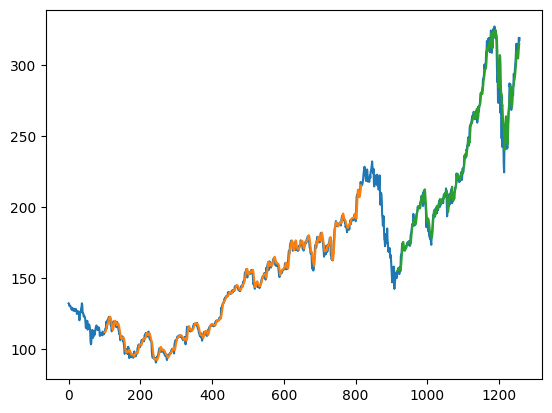

In [69]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [72]:
# blue color is actual value 
# orange is prediction for training data
# green is for test data 



1258
1258


In [78]:
len(test_data) 


441

> and the value at 441  is collected at  22/may to find the 23/may data since our timestep is 100 so we need to provide lat 100 days data
 
> so we are starting from 341

In [73]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [74]:
x_input

array([[0.85835515, 0.8866419 , 0.87431394, 0.88431985, 0.87836697,
        0.8986321 , 0.92582116, 0.92877649, 0.95676771, 0.93869797,
        0.93304061, 0.94950604, 0.96424048, 0.95512117, 0.95989192,
        0.96635143, 0.96246728, 0.92295027, 0.9598497 , 0.98792536,
        0.98594106, 0.92531453, 0.92172591, 0.96474711, 0.97572406,
        0.99159841, 0.96972895, 0.97614625, 0.96795575, 1.        ,
        0.99016297, 0.99050072, 0.96538039, 0.98488559, 0.97086887,
        0.94026007, 0.87748037, 0.83483915, 0.85413324, 0.77336823,
        0.77269273, 0.88014017, 0.84007431, 0.89673225, 0.85527316,
        0.83884995, 0.74233725, 0.82327113, 0.78143207, 0.6665963 ,
        0.7921557 , 0.64118044, 0.68614371, 0.66001013, 0.65203074,
        0.58642236, 0.56586169, 0.66089673, 0.65515494, 0.70970193,
        0.66452757, 0.69437642, 0.69218104, 0.63569197, 0.65266402,
        0.63780292, 0.7267162 , 0.71388162, 0.74191506, 0.75002111,
        0.77222832, 0.83049059, 0.8194292 , 0.82

In [83]:
# converting x_input to list
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
print(len(temp_input))
temp_input


100


[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [84]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9559882]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.9

In [85]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [86]:
import matplotlib.pyplot as plt

In [87]:
len(df1)

1258

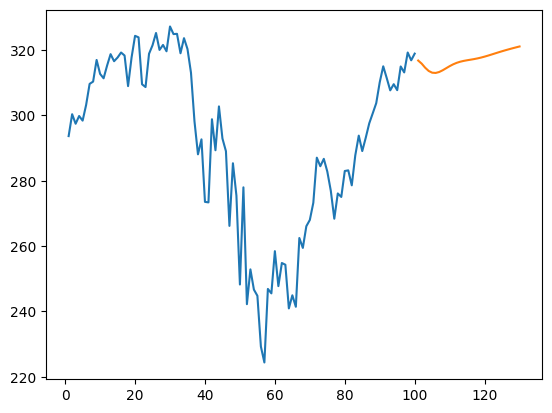

In [88]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:])) 
# since to predict future data we must analyze using last 100 days data (timestep=100)
plt.plot(day_pred,scaler.inverse_transform(lst_output))

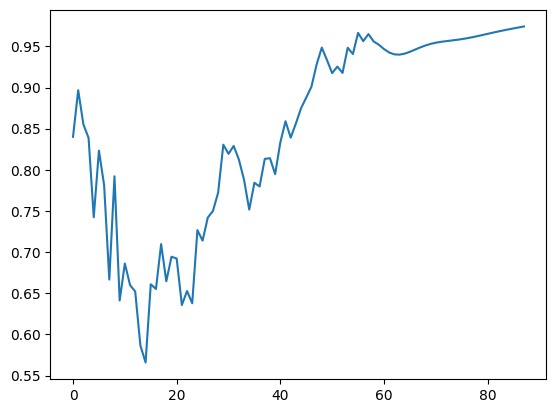

In [89]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

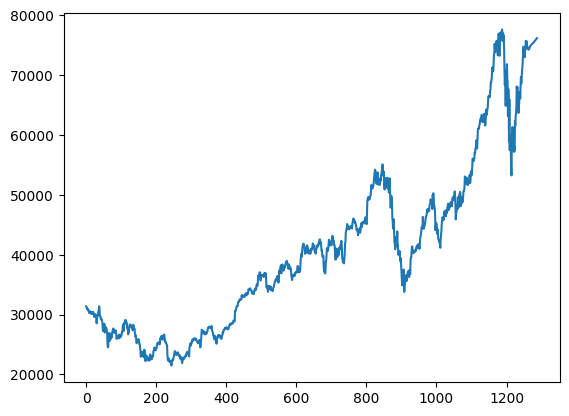

In [91]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)